# Метод главных компонент 1

# PART 1

## 2D Model data

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Generate data

In [3]:
sample_size = 1000  # Number of data points. Play with this.
sample_dimensionality = 2  # Dimensionality of data point. Do not change!

current_state = np.random.get_state()

np.random.seed(3143)

The data is generated by first sampling from an isotropic Gaussian distribution with zero mean and unit variance in all directions (whitened data) and then transforming the data by a random matrix and random mean. Coefficients of mean vector and transformation matrix are drawn from a normal distribution with variance one.

In [4]:
standard_data = np.random.normal(0, 1, 
    (sample_size, sample_dimensionality))                          # Initialize data with normal distribution (approximately whitened data).

initial_mean = np.random.normal(0, 1, sample_dimensionality)       # Initialize mean from normal distribution.
transformation_matrix = np.random.normal(0, 1, 
    (sample_dimensionality, sample_dimensionality))                # Create random transformation matrix.
data = np.dot(standard_data, transformation_matrix) + initial_mean # Transform initial data.

np.random.set_state(current_state)

## Calculate mean and principal components of data

Hints: `np.average`, `np.dot`, `np.transpose`, and `np.linalg.eigh` might be useful here.  Use `print(np.<name>?)` to learn more about `<name>`.

In [5]:
## EXERCISE 1

# SOLUTION
sample_mean = np.average(data, axis=0) # Data mean as list.
sample_covariance = np.cov(data.T, rowvar=True) # Data covariance estimation as a 2x2 dimensional array.
lambdas, eigen_vectors = np.linalg.eigh(sample_covariance)
# eigen vectors: Principal components as column (!) vectors in a 2x2 dimensional array.
# lambdas: Variances along the principal components as components of a list.

# EXERCISE END

In [6]:
print("sample_covariance * eigen_vectors:\n",np.dot(sample_covariance, eigen_vectors), end='\n\n')
print("eigen vectors * respective lamdas :\n", np.dot(eigen_vectors, [[lambdas[0], 0],
                                                                      [0, lambdas[1]]]))

sample_covariance * eigen_vectors:
 [[-0.14998103 -0.79628711]
 [-0.20779826  0.57473034]]

eigen vectors * respective lamdas :
 [[-0.14998103 -0.79628711]
 [-0.20779826  0.57473034]]


## Calculate expected mean and principal components from transformation matrix and initial mean

Since the initial data has zero mean and variance one in all directions, it is possible to predict the data mean and principal components.

Since the initial mean has been added to the data after applying the transformation matrix $\textbf{T}$, the expected mean of the data is equal to the initial mean.
 
If the initial data points $\vec{\hat{x}}_i$ have zero mean and unit variance in all directions, they are whitened, i.e. their 2nd moment matrix is the identity matrix $\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i = \textbf{I}$.  The zero mean transformed data points $\vec{x}_i := \textbf{T}\vec{\hat{x}}_i $, i.e. before adding the initial mean, then have the 2nd moment matrix 
 \begin{eqnarray}
   \langle \vec{x}_i \vec{x}_i^T \rangle_i 
   &=& \langle \textbf{T}\vec{\hat{x}}_i \vec{\hat{x}}_i^T\textbf{T}^T \rangle_i \\
   &=& \textbf{T} \underbrace{\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i}_{\textbf{I}} \textbf{T}^T \\
   &=& \textbf{T} \textbf{T}^T \,. 
 \end{eqnarray}
Applying PCA to this matrix should yield a good approximation of the principal components and variances of the transformed data points and are in fact the exact expectation values as the number of data points goes to infinity.


In [7]:
## EXERCISE 2

# SOLUTION
expected_mean = initial_mean # Expected data mean as a list.
expected_covariance_matrix = np.dot(transformation_matrix.T, transformation_matrix) # Expected covariance matrix
pcVarExp, pcVecExp = np.linalg.eigh(expected_covariance_matrix)
# pcVecExp: Expected principal components as column vectors in a 2x2 dimensional array.
# pcVarExp: Expected variances along the principal components as components of a 2 dimensional vector.
expected_lambdas = pcVarExp
expected_eigen_vectors = pcVecExp

# EXERCISE END

In [8]:
# Проверим, что это, действительно, собственные векторы матрицы sample_covariance с соответствующими с.з.
print("expected_covariance * eigen_vectors:\n",np.dot(expected_covariance_matrix, expected_eigen_vectors), end='\n\n')
print("eigen vectors * respective lamdas :\n", np.dot(expected_eigen_vectors, [[expected_lambdas[0], 0],
                                                                      [0, expected_lambdas[1]]]))

expected_covariance * eigen_vectors:
 [[-0.16826737 -0.74344239]
 [-0.21713138  0.5761355 ]]

eigen vectors * respective lamdas :
 [[-0.16826737 -0.74344239]
 [-0.21713138  0.5761355 ]]


# Plot data and eigenvectors scaled by standard deviation and centered at mean

The following plot shows the data points in black, the true mean offset vector in yellow, the data mean vector in blue on top, the expected eigenvectors in green, and the data eigenvectors in red on top.  Since the polarity of the eigenvectors is arbitrary, they are plotted $\pm$.

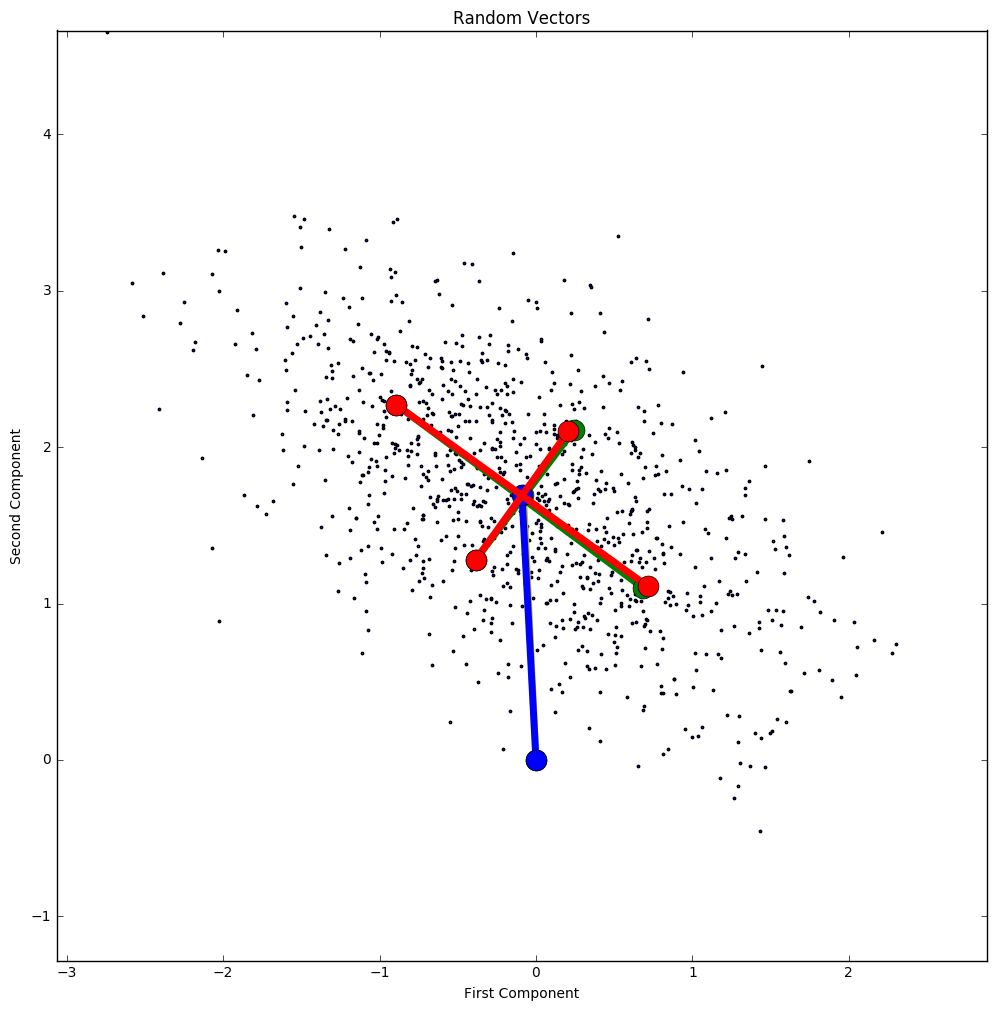

In [9]:
figure_handle = plt.figure(figsize=(12, 12))
subplot_handle = figure_handle.add_subplot(111)
root_lambdas = np.array([math.sqrt(x) for x in lambdas]) # Convert variances to standard deviations, ...
expected_root_lambdas = np.array([math.sqrt(x) for x in expected_lambdas]) # ... also for the expected values.
plot_range = 3 * np.max(root_lambdas) # Take the largest standard deviation for the plot range.
subplot_handle.set(xlim = [sample_mean[0] - plot_range, sample_mean[0] + plot_range], 
                   ylim = [sample_mean[1] - plot_range, sample_mean[1] + plot_range], 
                   title='Random Vectors', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(data[:, 0], data[:, 1], s=3) # Plot data points.
subplot_handle.plot([0, expected_mean[0]], [0, expected_mean[1]],
    'yo-',markersize=15,linewidth=5) # Plot ground truth mean offset of the data in yellow.
for component in range(0, 2):
    subplot_handle.plot(
        [expected_mean[0] - expected_eigen_vectors[0, component] * expected_root_lambdas[component], 
                         sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
        
            [expected_mean[1] - expected_eigen_vectors[1, component] * expected_root_lambdas[component],
             sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
            'go-',markersize=15,linewidth=5) # Plot expected eigenvectors scaled by standard deviation in green, ...
subplot_handle.plot([0, sample_mean[0]], [0, sample_mean[1]],
        'bo-',markersize=15,linewidth=5) # Plot data mean offset of the mixed data in blue.
for component in range(0,2):
    subplot_handle.plot([sample_mean[0] - eigen_vectors[0, component] * root_lambdas[component],
                         sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
                        [sample_mean[1] - eigen_vectors[1, component] * root_lambdas[component], 
                         sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
                        'ro-', markersize=15, linewidth=5) # ... and data eigenvectors in red on top.
plt.show()

## Whiten the data

Knowing the mean, principal components and variances of the data allows us to whiten the data, i.e. normalize it such that it has zero mean and unit variance in all directions.

$U$ матрица перехода.
Если векторы - это столбцы, то объект $y_i$ в новых координатах: $U^{-1} x_i$. Но у нас объект - это строка. В таком случае формируем $U$ по-другому: $U_i$ - $i$-ая строка - это собственный вектор(в старых координатах).

Тогда:  
$y_i = x_i * U^{-1}$  
$Y = X * U^{-1}$

In [11]:
# SOLUTION
data_centered = data - sample_mean
X = data_centered
U = eigen_vectors.T
U[0, :] *= np.sqrt(lambdas[0])
U[1, :] *= np.sqrt(lambdas[1])
whitening_matrix = np.linalg.inv(U)
whitened_data = np.dot(X, whitening_matrix)

print("\nWhitening matrix:\n", whitening_matrix)
print("\nWhitened data:\n", whitened_data)

# EXERCISE END


Whitening matrix:
 [[-1.15608327 -0.81824017]
 [-1.60174982  0.59057523]]

Whitened data:
 [[-0.60080602  0.20341329]
 [-1.15869706  0.74803145]
 [ 0.92267058 -1.08464612]
 ..., 
 [-1.24062457 -2.51566752]
 [ 0.76114471  0.27187774]
 [ 2.85003556 -0.47742806]]


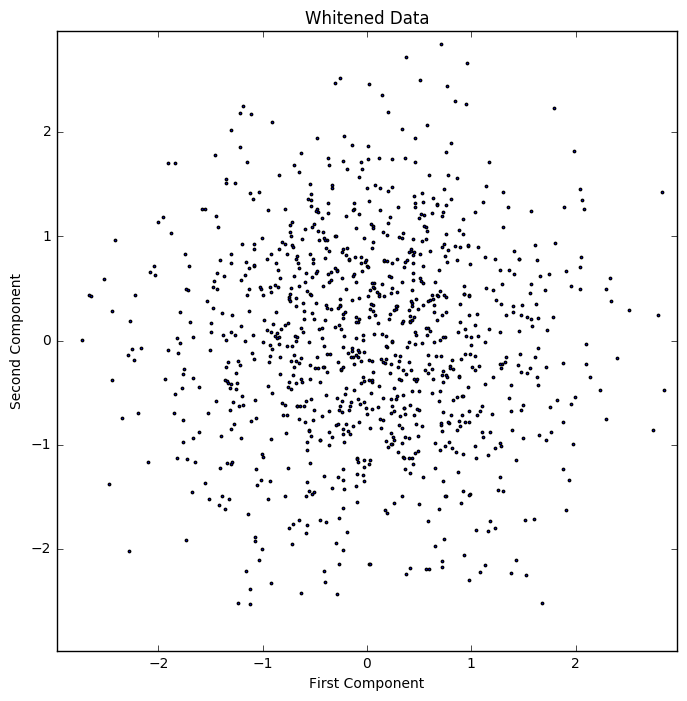

In [12]:
figure_handle = plt.figure(figsize=(8,8))
subplot_handle = figure_handle.add_subplot(111)
plotRange = 4
subplot_handle.set(xlim=[-plot_range, +plot_range], ylim=[-plot_range, +plot_range], 
                   title='Whitened Data', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(whitened_data[:, 0], whitened_data[:, 1], s=3) # Plot data points.
plt.show()

## Exercise 4

Vary the number of data points and observe how much the solution depends on it.

### Solution

I find it amazing how robust the solution is to the number of data points.  In some sense the mean seams more sensitive than the eigenvectors.

Pretty quickly (starting with a small n - sample size), the main components of the data approximate the theoretical main components.
Already at n = 50, the result is subjectively satisfactory. With n = 1000, the difference is practically not visible.

## Exercise 5

Make your previous experiments repeatable.

# PART 2

## PCA for real data

### 1. Airfoils

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline

In [15]:
data = np.loadtxt('airfoils.csv', delimiter=',')
ref_points = np.loadtxt('ref_points.csv', delimiter=',')
test_point = np.loadtxt('test_afl.csv', delimiter=',')

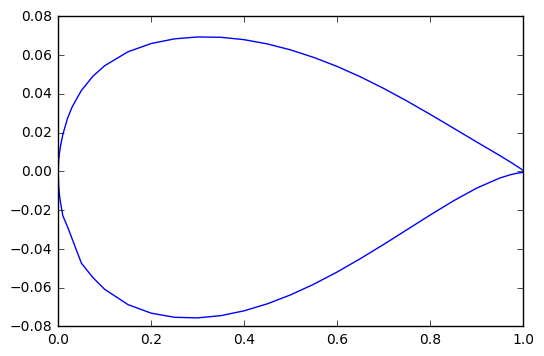

In [16]:
plt.plot(ref_points, test_point, label = 'Original')
plt.show()

In [17]:
## EXERCISE 6 

# SOLUTION
sample_size = data.shape[0]
sample_dim = data.shape[1]
sample_mean = np.average(data, axis=0)
centered_data = data - sample_mean
sample_covariance = np.cov(data.T, rowvar=True)
lambdas, eigen_vectors = np.linalg.eigh(sample_covariance)
lambdas = lambdas[::-1]
eigen_vectors = eigen_vectors[:, ::-1]

# EXERCISE END

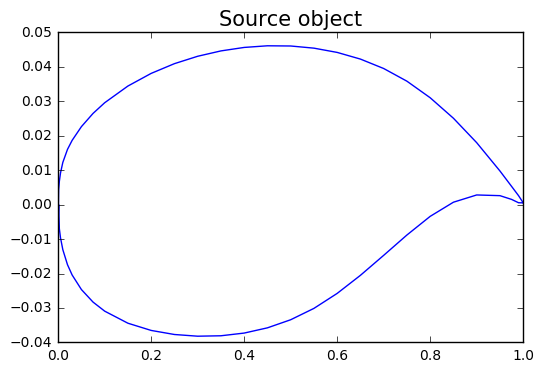

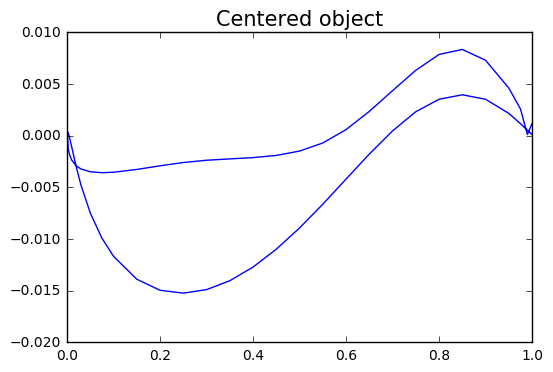

In [18]:
plt.plot(ref_points, data[5])
plt.title("Source object", fontsize=15)
plt.show()

plt.plot(ref_points, centered_data[5])
plt.title("Centered object", fontsize=15)
plt.show()

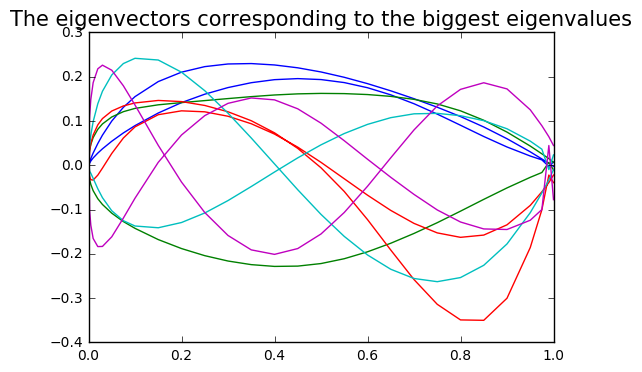

In [18]:
## EXERCISE 7 

# SOLUTION
plt.title("The eigenvectors corresponding to the biggest eigenvalues", fontsize=15)
for index_eigen_vector in range(5):
    plt.plot(ref_points, eigen_vectors[:, index_eigen_vector], label = "eigen vector № {}".format(index_eigen_vector))
plt.show()

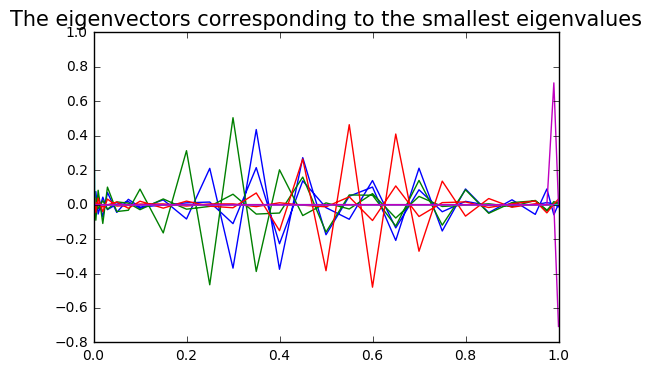

In [19]:
plt.title("The eigenvectors corresponding to the smallest eigenvalues", fontsize=15)
for index_eigen_vector in range(sample_dim - 5, sample_dim):
    plt.plot(ref_points, eigen_vectors[:, index_eigen_vector], label = "eigen vector № {}".format(index_eigen_vector))
plt.show()  

# EXERCISE END

### Choose sample dimensionality

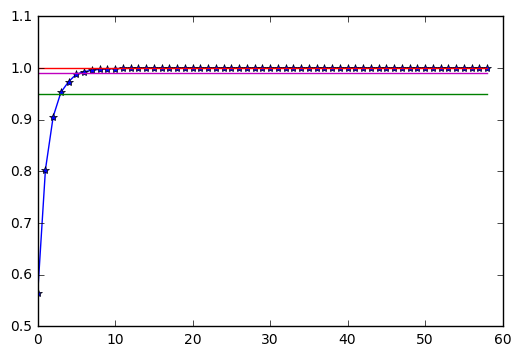

In [20]:
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

In [21]:
## EXERCISE 8 
# Find coordinates of sample points in the eigen basis
# Plot projections of test airfoil on the different dimensions
# plt.plot(ref_points, ..., label = 'projection on ...first components')

$U$ - матрица перехода. Собственные векторы записаны по строкам.  
Имеем в виду, что np.linal.eigh - вернул ортонормированный собственный базис.  
$y_i = x_i U^{-1}$  
$Y = X U^{-1}$

In [22]:
# SOLUTION
U = eigen_vectors.T
X = centered_data
Y = np.dot(X, np.linalg.inv(U))

Обратное преобразование:  
$X = Y U$

Если нас интересует не полностью восстановленный объект $x_i$, а только его проекция на n главных компонент, то у $y_i$ 
надо брать только первые n координат
$\hat{x_i} = \hat{y_i} \hat{U}$

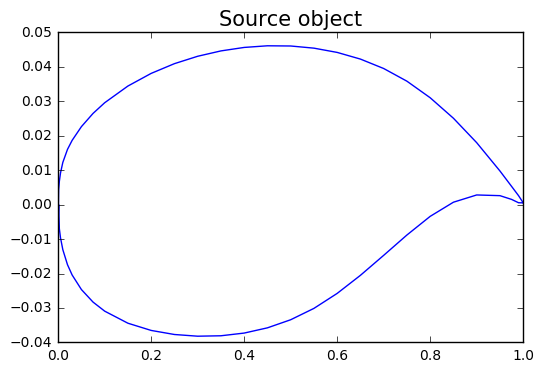

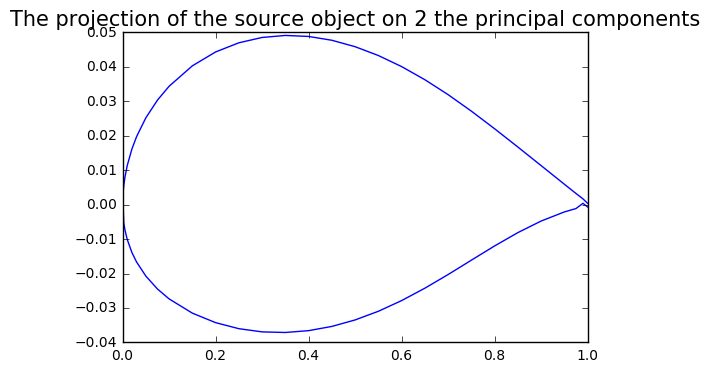

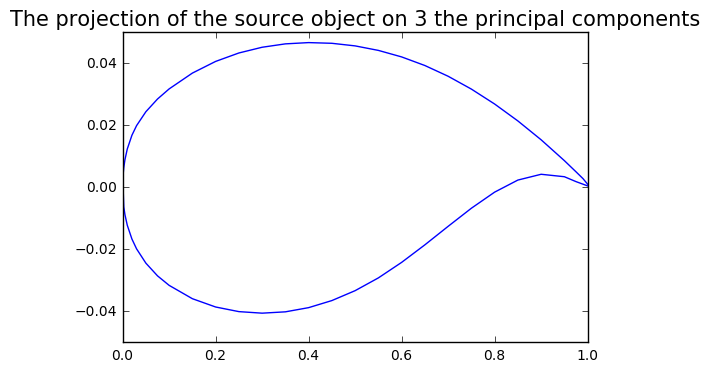

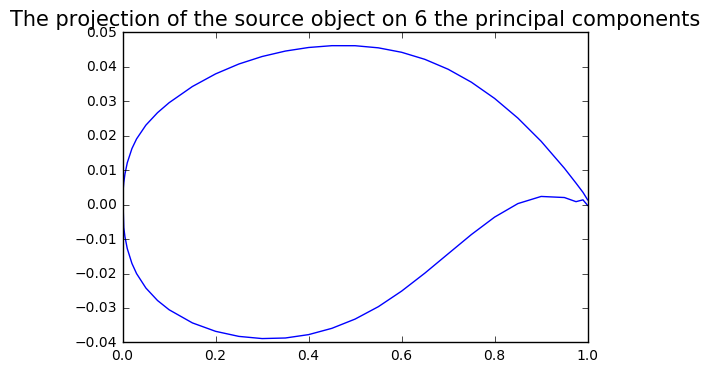

In [23]:
def plot_test_point(count_principal_components=2, index_object=0, plot_original=False):
     # input: the number of main components, and which object from the sample to draw
     # output: draws the source object (after centering) and the projected object into n main components
     # Note: draw not centered objects, but perform backward parallel transport before drawing.
    
    if (count_principal_components > data.shape[1]):
        print("to many principal components")
        return
    if (plot_original):
        plt.plot(ref_points, centered_data[index_object] + sample_mean)
        plt.title("Source object", fontsize=15)
        plt.show()
    
    y = Y[index_object]
    y_cut = y[:count_principal_components]
    U_cut = U[:count_principal_components]
    x_projection = np.dot(y_cut, U_cut) + sample_mean
    plt.title("The projection of the source object on {} the principal components".format(count_principal_components), fontsize=15)
    plt.plot(ref_points, x_projection)
    plt.show()
    plt.close()
    
plot_test_point(count_principal_components=2, index_object=5, plot_original=True)
plot_test_point(count_principal_components=3, index_object=5)
plot_test_point(count_principal_components=6, index_object=5)

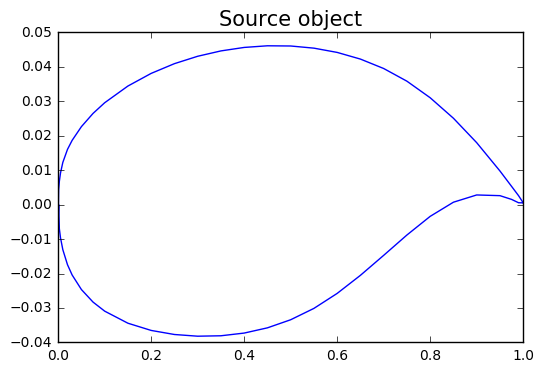

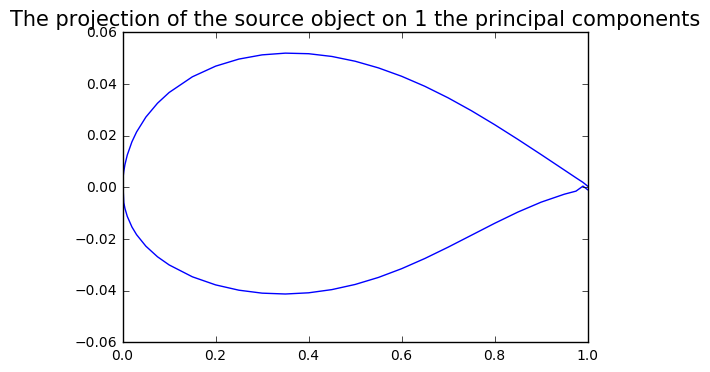

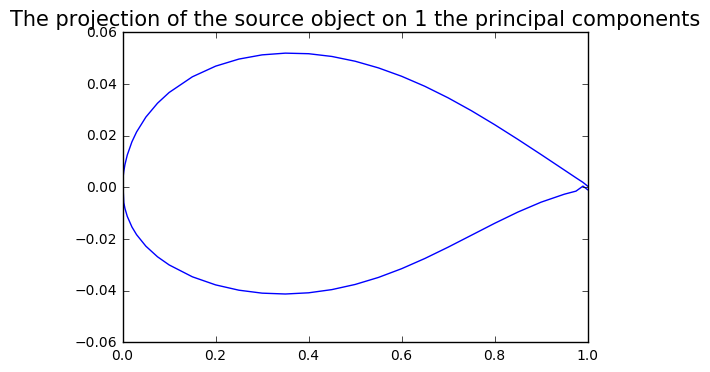

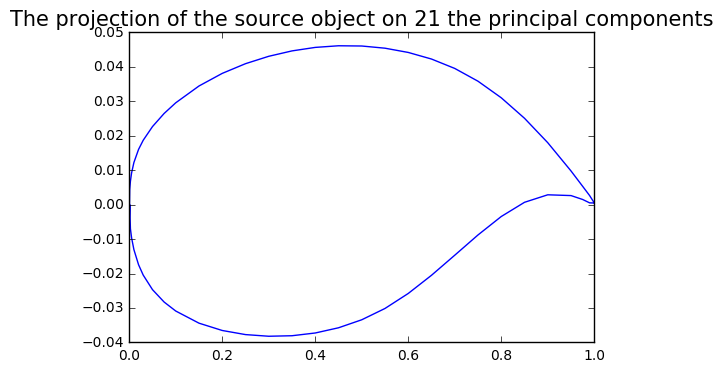

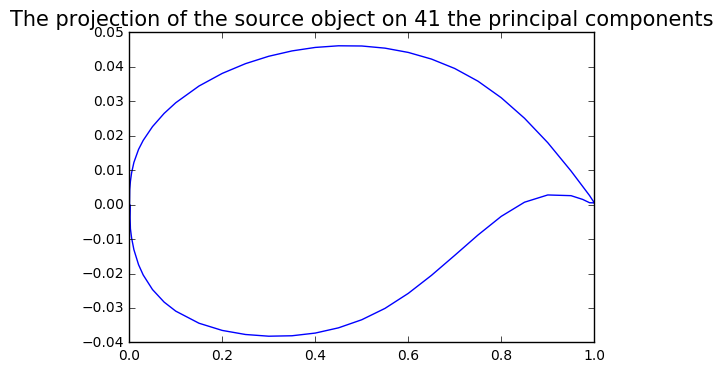

In [24]:
# возьмем произвольный объект из выборки и нариуем его проекции на различное количество главных компонент
index_object = np.random.randint(sample_size)
index_object = 5
plot_test_point(count_principal_components=1, index_object=index_object, plot_original=True)
for count_principal_components in range(1, 56, 20):
    plot_test_point(count_principal_components, index_object, plot_original=False)

## Digits

(1797, 64)


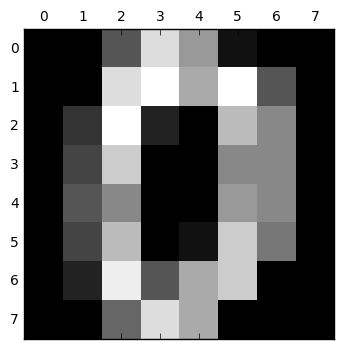

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(digits.data[0].reshape(8, 8)) 
plt.show() 

In [27]:
## EXERCISE 9 
# Repeat 6-8 for the new sample

# SOLUTION
data = digits.data
sample_size = data.shape[0]
sample_dim = data.shape[1]
sample_mean = np.average(data, axis=0)
centered_data = data - sample_mean
sample_covariance = np.cov(data.T, rowvar=True)
lambdas, eigen_vectors = np.linalg.eigh(sample_covariance)
lambdas = lambdas[::-1]
eigen_vectors = eigen_vectors[:, ::-1]

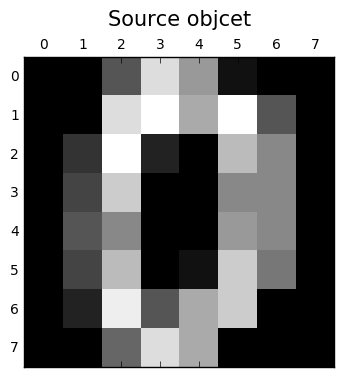

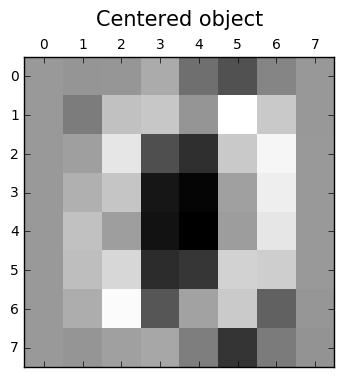

In [28]:
# как выглядит объект после центрирования:
fig = plt.figure()
plt.matshow(data[0].reshape(8, 8))
plt.title("Source objcet", fontsize=15, y=1.08)
plt.show()

fig = plt.figure()
plt.matshow(centered_data[0].reshape(8, 8))
plt.title("Centered object", fontsize=15, y=1.08)
fig.subplots_adjust(top=0.3) # сдвинуть подграфики вниз, чтобы не пересекать заголовок
plt.show()

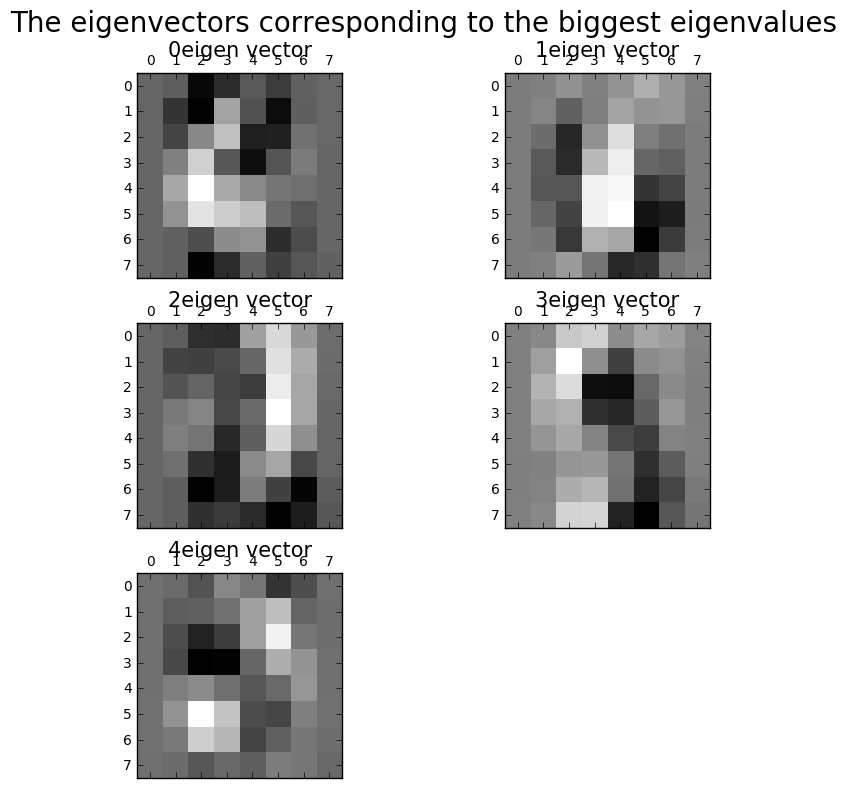

In [29]:
# Собственные значения отсортированы по убыванию
fig = plt.figure(figsize=(8, 8))
fig.suptitle("The eigenvectors corresponding to the biggest eigenvalues", fontsize=20)
for index_eigen_vector in range(5):
    ax = plt.subplot(3, 2, index_eigen_vector + 1)
    ax.set_title("{}eigen vector".format(index_eigen_vector), fontsize=15)
    ax.matshow(eigen_vectors[:, index_eigen_vector].reshape(8, 8))
    
fig.tight_layout() # сделать так, чтобы подграфики не пересекались
fig.subplots_adjust(top=0.9) # сдвинуть подграфики вниз, чтобы не пересекать заголовок

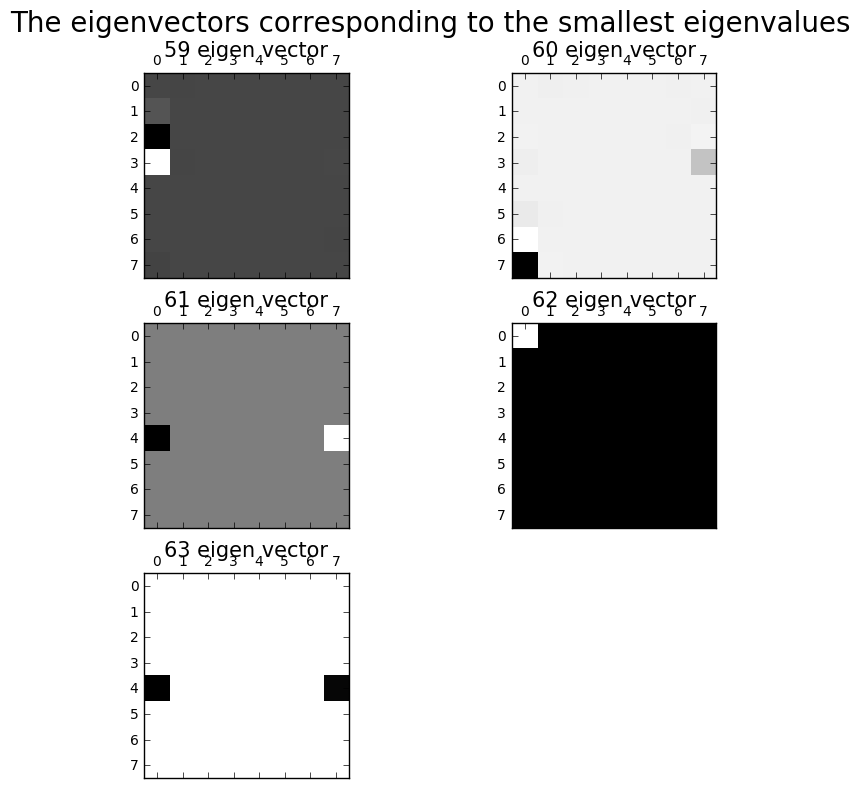

In [30]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("The eigenvectors corresponding to the smallest eigenvalues", fontsize=20)
index_subplot = 1
for index_eigen_vector in range(sample_dim - 5, sample_dim):
    ax = plt.subplot(3, 2, index_subplot)
    index_subplot += 1
    ax.set_title("{} eigen vector".format(index_eigen_vector), fontsize=15)
    ax.matshow(eigen_vectors[:, index_eigen_vector].reshape(8, 8))
    
fig.tight_layout() # сделать так, чтобы подграфики не пересекались
fig.subplots_adjust(top=0.9) # сдвинуть подграфики вниз, чтобы не пересекать заголовок

### Choose sample dimensionality

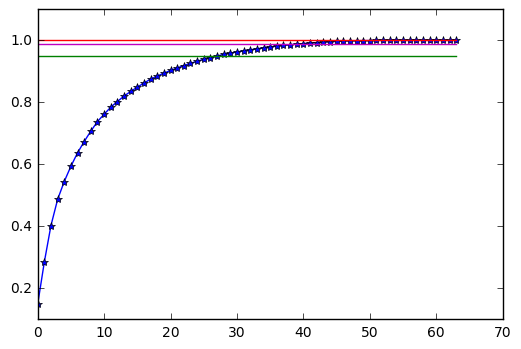

In [31]:
completeness = np.cumsum(lambdas) / np.sum(lambdas) # доля сохраненной информации, если проецируем на первые i главных компонент
plt.plot(range(sample_dim), completeness, "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

In [32]:
# посмотрим на completeness
treshold1 = np.searchsorted(completeness, 0.9)
treshold2 = np.searchsorted(completeness, 0.95)
treshold3 = np.searchsorted(completeness, 0.99)
print(treshold1, treshold2, treshold3)

20 28 40


### Как видно, для сохранения 95 процентов информации, нужно процецировать на более количество главных компонент, чем в случае предыдущей выборки(крыльев самолета)

$U$ - матрица перехода. Собственные векторы записаны по строкам.  
Имеем в виду, что np.linal.eigh - вернул ортонормированный собственный базис.  
$y_i = x_i U^{-1}$  
$Y = X U^{-1}$

In [33]:
U = eigen_vectors.T
X = centered_data
Y = np.dot(X, np.linalg.inv(U))

Обратное преобразование:  
$X = Y U$  
Если нас интересует не полностью восстановленный объект $x_i$, а только его проекция на n главных компонент, то у $y_i$  надо брать только первые n координат
$\hat{x_i} = \hat{y_i} \hat{U}$

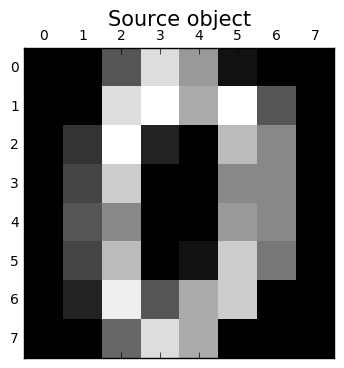

1


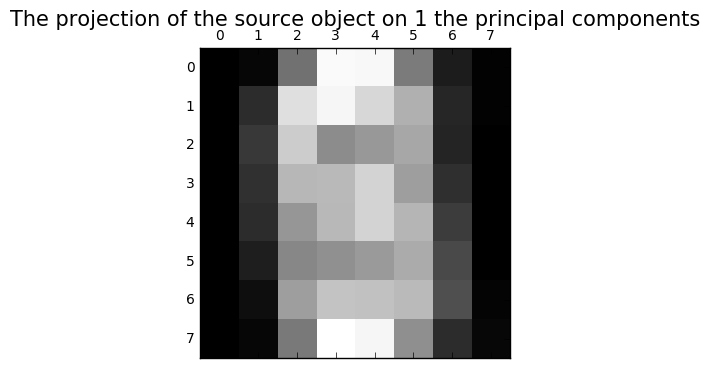

2


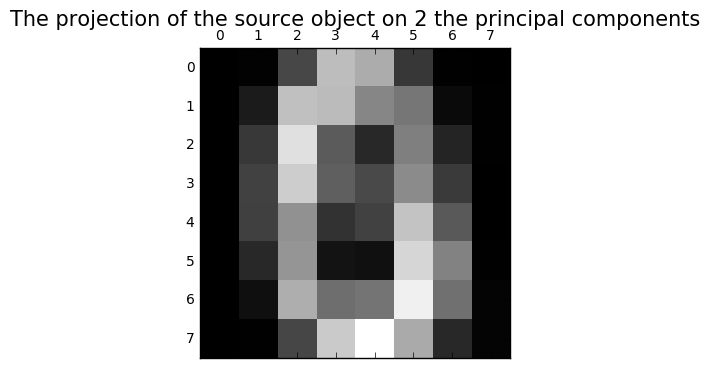

4


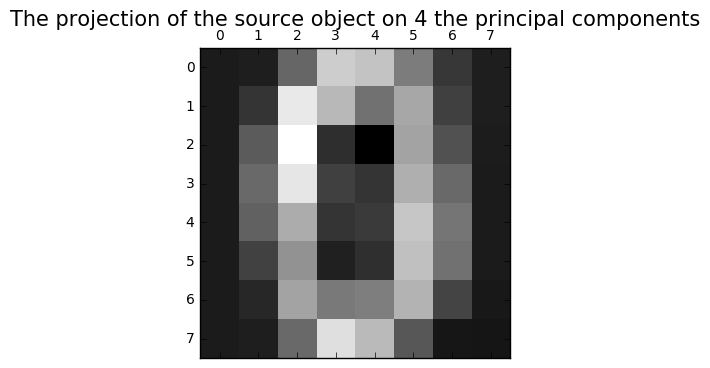

28


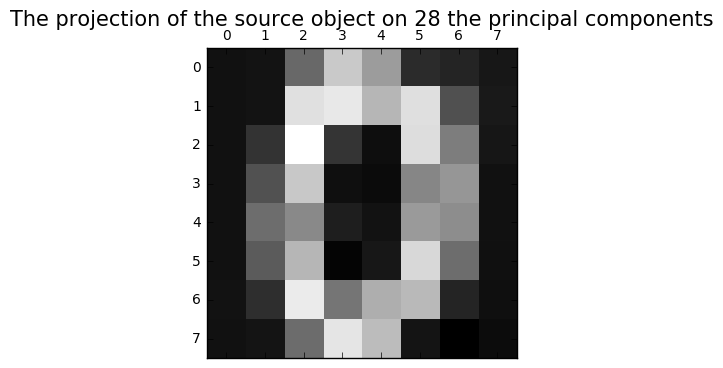

64


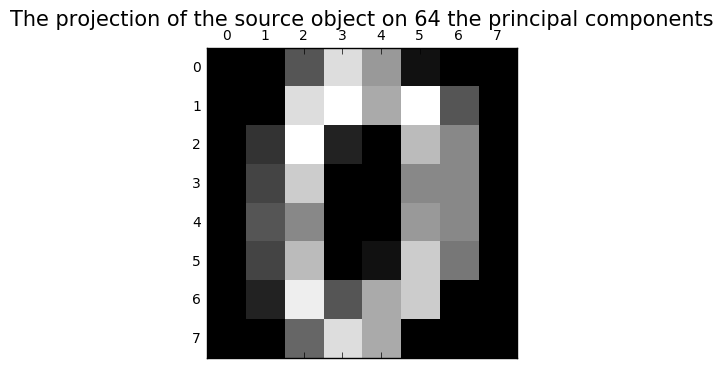

In [35]:
def plot_test_digit(count_principal_components=20, index_object=0, plot_original=False):
    # принимает: количество главных компонент, и какой объект из выборки рисовать
    # рисует исходный объект(после центрирования) и спроецированный объект на n главных компонент

    #Замечание: рисуем не центрированные объекты, а выполняем обратно параллельный перенос перед тем, как рисовать.
    
    if (count_principal_components > data.shape[1]):
        print("to many principal components")
        return
    if (plot_original):
        plt.matshow((X[index_object] + sample_mean).reshape(8, 8))
        plt.title("Source object", fontsize=15)
        plt.show()
    
    y = Y[index_object]
    print(count_principal_components)
    y_cut = y[:count_principal_components]
    U_cut = U[:count_principal_components]
    x_projection = np.dot(y_cut, U_cut)
    plt.matshow((x_projection + sample_mean).reshape(8, 8))
    plt.title("The projection of the source object on {} the principal components".format(count_principal_components), fontsize=15)
    plt.show()
    #plt.close()

plot_test_digit(count_principal_components=1, index_object=0, plot_original=True)
plot_test_digit(count_principal_components=2, index_object=0)
plot_test_digit(count_principal_components=4, index_object=0)
plot_test_digit(count_principal_components=28, index_object=0)
plot_test_digit(count_principal_components=64, index_object=0)


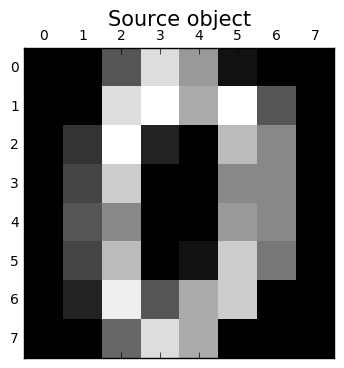

1


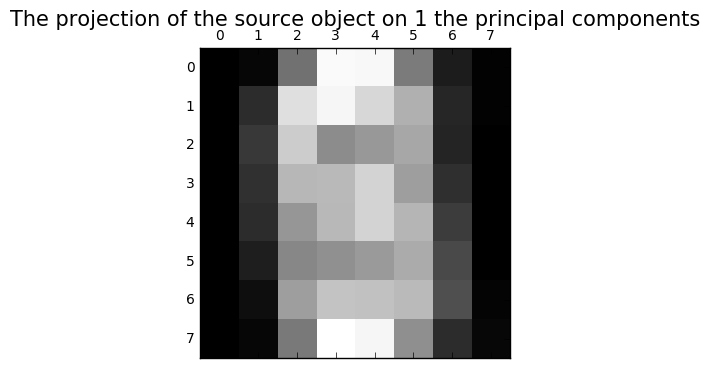

10


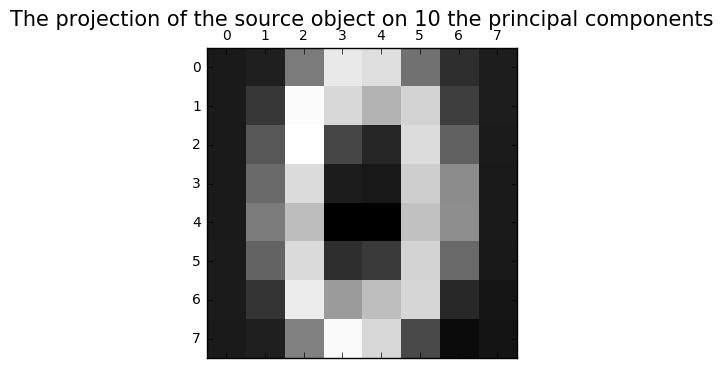

60


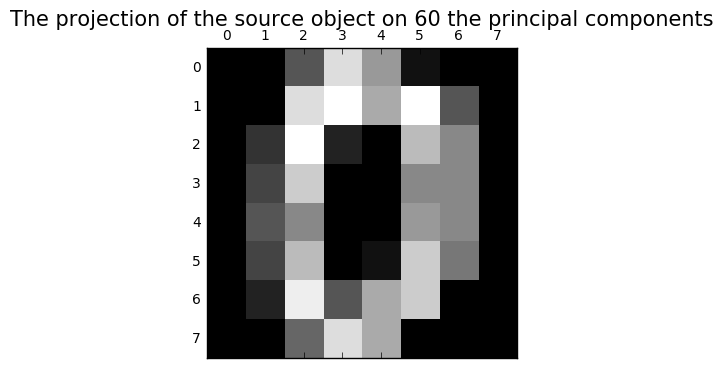

In [36]:
# возьмем произвольный объект из выборки и нариуем его проекции на различное количество главных компонент
index_object = np.random.randint(sample_size)
index_object = 0
plot_test_digit(count_principal_components=1, index_object=index_object, plot_original=True)
for count_principal_components in [10, 60]:
    plot_test_digit(count_principal_components, index_object, plot_original=False)

## Faces

In [37]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

In [38]:
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)
print(faces.shape, faces_centered.shape)

Dataset consists of 400 faces
(400, 4096) (400, 4096)


In [39]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    #plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.subplots_adjust(0.05, 0.05, 1, 0.95, 0.1, 0.)

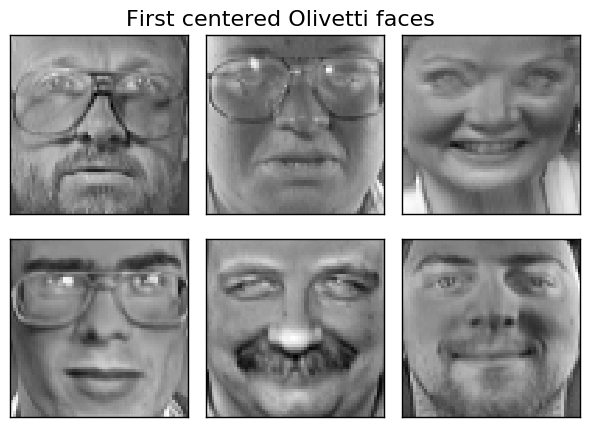

In [40]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

In [41]:
## EXERCISE 10 
# Repeat 6-8 for the new sample

In [42]:
# SOLUTION
height = 64
width = 64
data = faces
centered_data = faces_centered
sample_size = data.shape[0]
sample_dim = data.shape[1]
sample_mean = np.average(data, axis=0)
sample_covariance = np.cov(data.T, rowvar=True)
lambdas, eigen_vectors = np.linalg.eigh(sample_covariance)
lambdas = lambdas[::-1]
eigen_vectors = eigen_vectors[:, ::-1]
print("\nNumerical mean of centered data (should be zero):\n", np.average(centered_data, axis=0)) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)
print('\n Eigen vectors:\n', eigen_vectors)


Numerical mean of centered data (should be zero):
 [  1.17579475e-07   1.43442307e-07   6.18770741e-08 ...,  -1.88592821e-08
  -1.66893006e-08  -3.47010776e-08]

Variances:
 [  1.88401758e+01   1.10717621e+01   6.30461472e+00 ...,  -2.64276710e-15
  -2.73997994e-15  -3.27766315e-15]

Estimation of covariance matrix:
 [[ 0.0326506   0.03229796  0.02867434 ..., -0.0062897  -0.00601135
  -0.00467442]
 [ 0.03229796  0.03591166  0.03411554 ..., -0.0089469  -0.00847119
  -0.0067598 ]
 [ 0.02867434  0.03411554  0.03792458 ..., -0.01218907 -0.01133785
  -0.00948972]
 ..., 
 [-0.0062897  -0.0089469  -0.01218907 ...,  0.03528458  0.03143893
   0.02803686]
 [-0.00601135 -0.00847119 -0.01133785 ...,  0.03143893  0.03371498
   0.03130744]
 [-0.00467442 -0.0067598  -0.00948972 ...,  0.02803686  0.03130744
   0.03262884]]

 Eigen vectors:
 [[ -4.19110344e-03  -2.85913917e-02   1.35690806e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -7.10950080e-03  -3.32883617e-02  -3.25796997e-

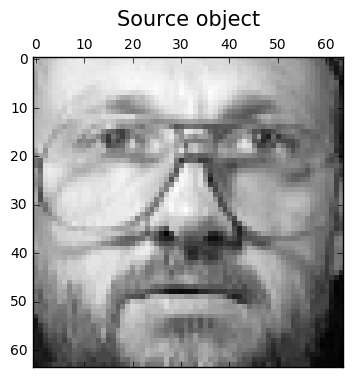

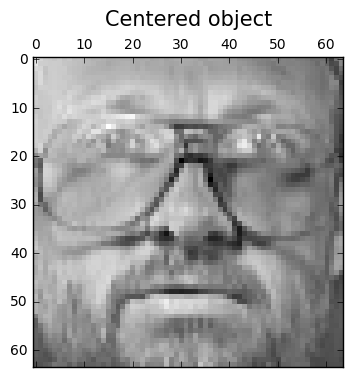

In [43]:
# как выглядит объект после центрирования:
fig = plt.figure()
plt.matshow(data[0].reshape(height, width))
plt.title("Source object", fontsize=15, y=1.08)
plt.show()

fig = plt.figure()
plt.matshow(centered_data[0].reshape(height, width))
plt.title("Centered object", fontsize=15, y=1.08)
fig.subplots_adjust(top=0.3) # сдвинуть подграфики вниз, чтобы не пересекать заголовок
plt.show()

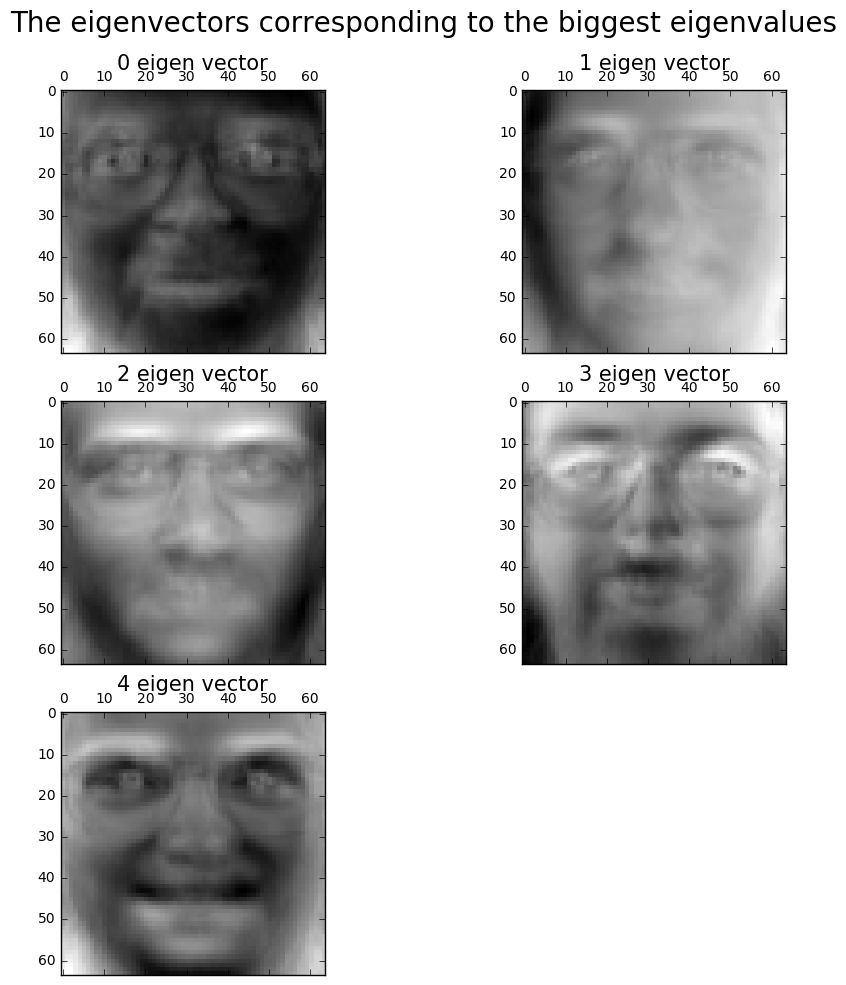

In [44]:
# Собственные значения отсортированы по убыванию
fig = plt.figure(figsize=(10, 10))
fig.suptitle("The eigenvectors corresponding to the biggest eigenvalues", fontsize=20)
for index_eigen_vector in range(5):
    ax = plt.subplot(3, 2, index_eigen_vector + 1)
    ax.set_title("{} eigen vector".format(index_eigen_vector), fontsize=15)
    ax.matshow(eigen_vectors[:, index_eigen_vector].reshape(height, width))
    
fig.tight_layout() # сделать так, чтобы подграфики не пересекались
fig.subplots_adjust(top=0.9) # сдвинуть подграфики вниз, чтобы не пересекать заголовок

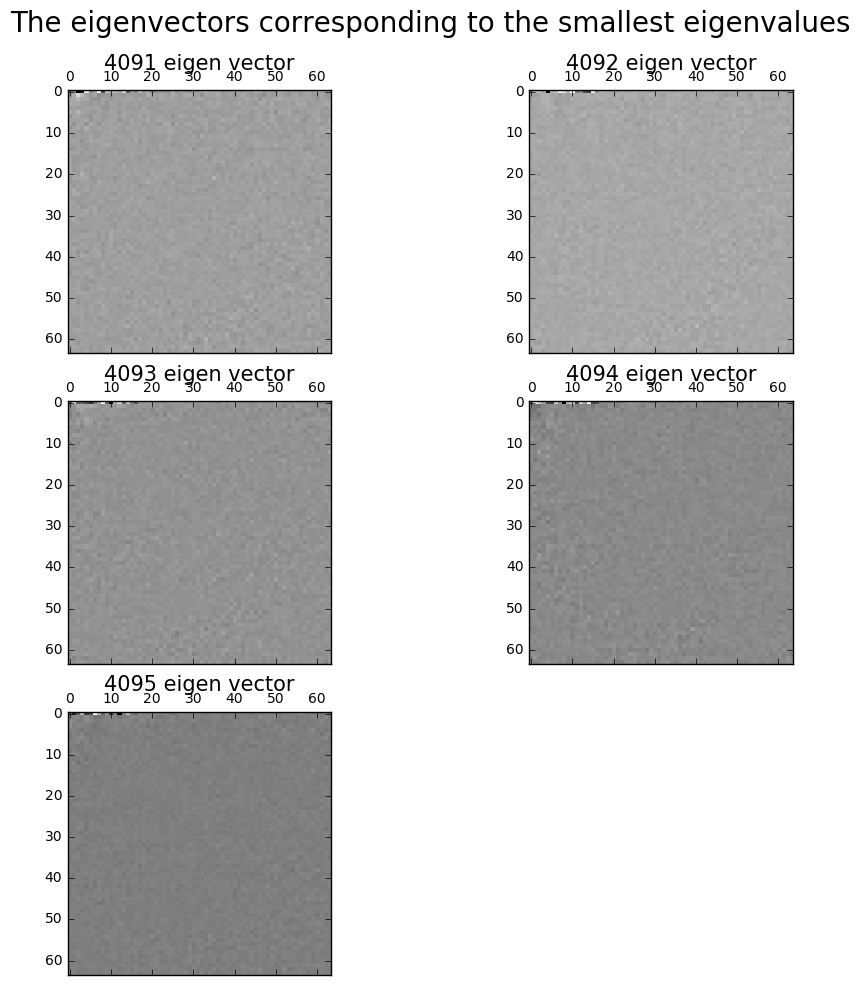

In [45]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("The eigenvectors corresponding to the smallest eigenvalues", fontsize=20)
index_subplot = 1
for index_eigen_vector in range(sample_dim - 5, sample_dim):
    ax = plt.subplot(3, 2, index_subplot)
    index_subplot += 1
    ax.set_title("{} eigen vector".format(index_eigen_vector), fontsize=15)
    ax.matshow(eigen_vectors[:, index_eigen_vector].reshape(height, width))
    
fig.tight_layout() # сделать так, чтобы подграфики не пересекались
fig.subplots_adjust(top=0.9) # сдвинуть подграфики вниз, чтобы не пересекать заголовок

### Choose sample dimensionality

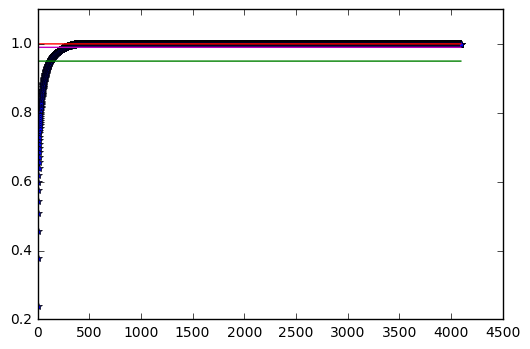

In [46]:
completeness = np.cumsum(lambdas) / np.sum(lambdas) # доля сохраненной информации, если проецируем на первые i главных компонент
plt.plot(range(sample_dim), completeness, "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

In [47]:
# посмотрим на completeness
treshold1 = np.searchsorted(completeness, 0.9)
treshold2 = np.searchsorted(completeness, 0.95)
print(treshold1, treshold2)

65 122


In [48]:
print("для сохранения 95 процентов информации лица достаточно хранить только {} числа, а не все {}".format(treshold2, sample_dim))
print("Замечание: конечно, не забываем о матрице размера {0}*{0}, которая хранит собственные векторы.".format(sample_dim))

для сохранения 95 процентов информации лица достаточно хранить только 122 числа, а не все 4096
Замечание: конечно, не забываем о матрице размера 4096*4096, которая хранит собственные векторы.


In [49]:
U = eigen_vectors.T
X = centered_data
Y = np.dot(X, np.linalg.inv(U))

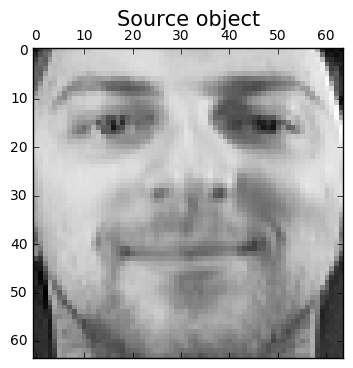

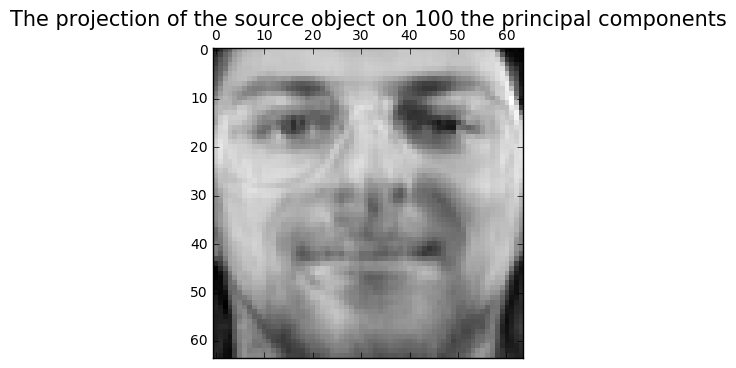

In [50]:
def plot_test_face(count_principal_components=20, index_object=0, plot_original=False):
    # принимает: количество главных компонент, и какой объект из выборки рисовать
    # рисует исходный объект(после центрирования) и спроецированный объект на n главных компонент

    #Замечание: рисуем не центрированные объекты, а выполняем обратно параллельный перенос перед тем, как рисовать.
    
    if (count_principal_components > sample_dim):
        print("to many principal components")
        return
    if (plot_original):
        plt.matshow((X[index_object] + sample_mean).reshape(width, height))
        plt.title("Source object", fontsize=15)
        plt.show()
    
    y = Y[index_object]
    y_cut = y[:count_principal_components]
    U_cut = U[:count_principal_components]
    x_projection = np.dot(y_cut, U_cut)
    plt.matshow((x_projection + sample_mean).reshape(width, height))
    plt.title("The projection of the source object on {} the principal components".format(count_principal_components), fontsize=15)
    plt.show()
    plt.close()
    
plot_test_face(count_principal_components=100, index_object=5, plot_original=True)

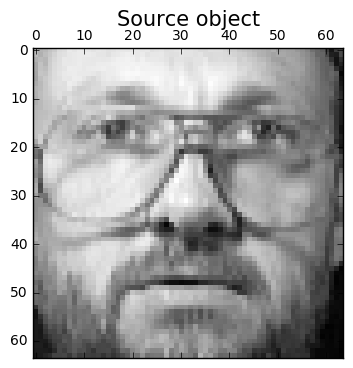

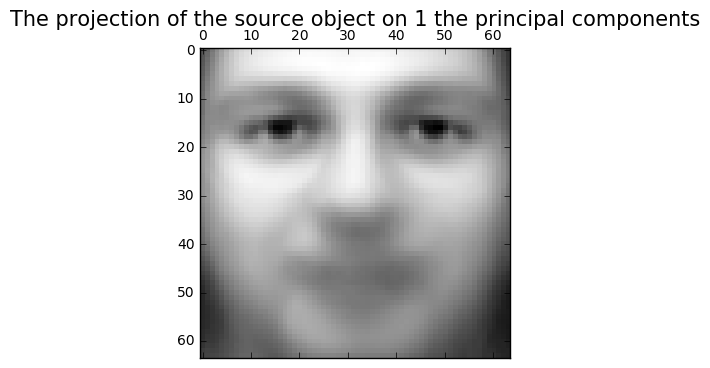

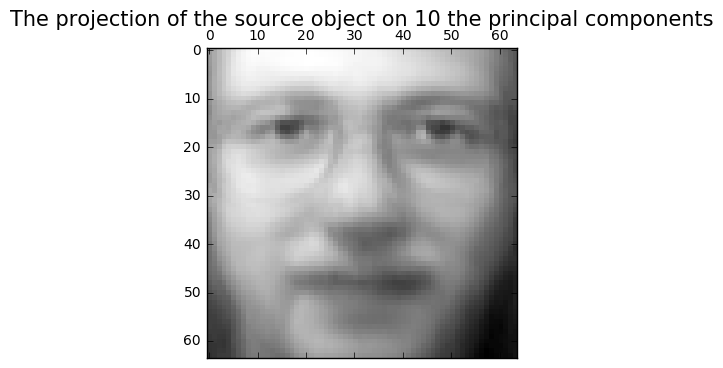

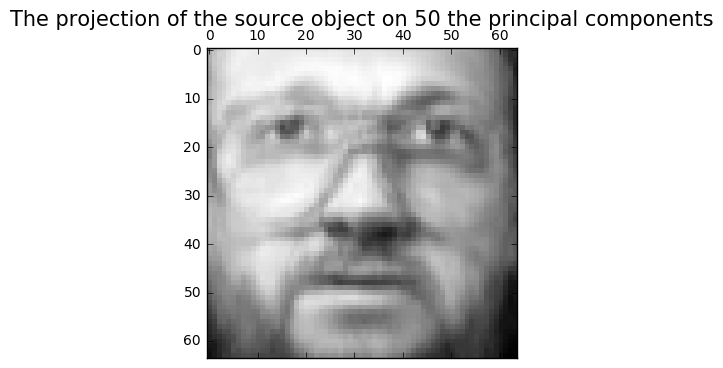

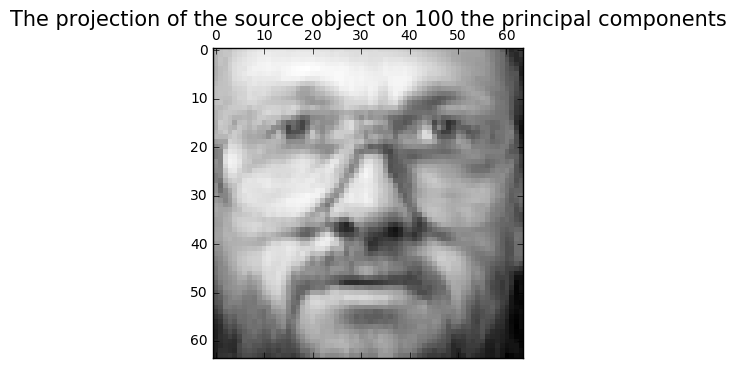

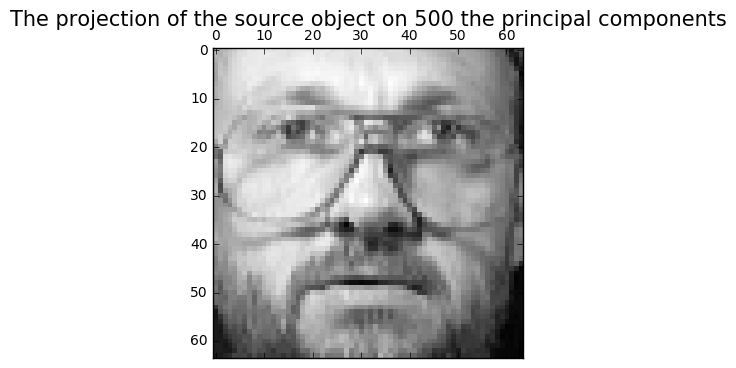

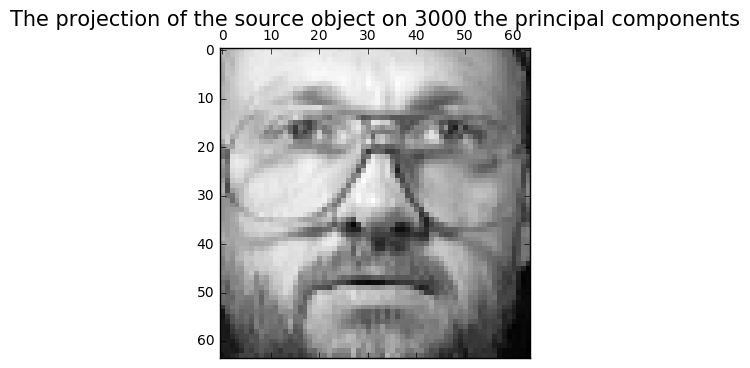

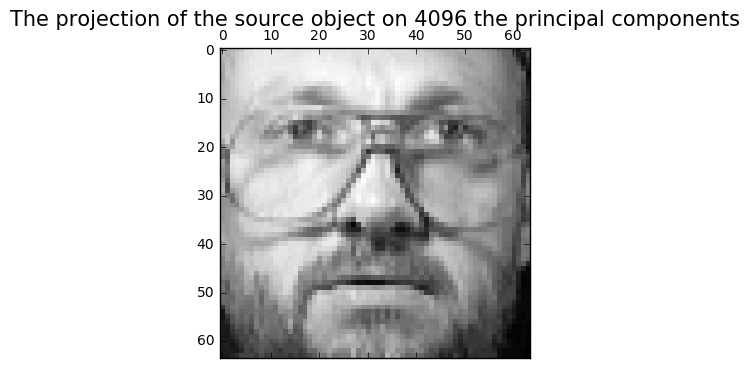

In [51]:
# возьмем произвольный объект из выборки и нариуем его проекции на различное количество главных компонент
index_object = np.random.randint(sample_size)
index_object = 0
plot_test_face(count_principal_components=1, index_object=index_object, plot_original=True)
for count_principal_components in [10, 50, 100, 500, 3000, sample_dim]:
    plot_test_face(count_principal_components, index_object, plot_original=False)

## Conclusion 1

In this paper, a linear method was considered for reducing the dimensionality of PCA data. To demonstrate the capabilities of the method, several data sets were used:
* Airfoils
* Digits
* Faces

The possibility of data compression with the loss of "invisible to the eye" could not fail to impress. For example, 4096 numbers are required to store one source image from the Olivetti face set. With the principal component method, this number can be stirred up to 150 with a loss, loosely speaking, of only 5%. It is practical imperceptible to man. Thus, for one image 30 times less memory is required. But you need to keep in mind that to restore the object you need to perform a linear transformation matrix of size 4096 * 150. And, accordingly, it must also be stored. But if this method squeezed a lot of objects, for example, 100000, then the benefit from memory is obvious.